#### Model Training

Import Data and Required Packages

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


Importing data as Pandas Dataframe

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")

Show top 5 data points from dataframe

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [5]:
x = df.drop(columns=['math score'])

In [6]:
x.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [7]:
numerical_features = [feature for feature in x.columns if x[feature].dtype !='O']
categorical_features = [feature for feature in x.columns if x[feature].dtype =='O']

print(f"There are {len(categorical_features)} categorical features and features are {categorical_features}")
print(f"There are {len(numerical_features)} numerical features and features are {numerical_features}")

There are 5 categorical features and features are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
There are 2 numerical features and features are ['reading score', 'writing score']


All categories in each features

In [8]:
for feature in categorical_features:
    print(f'All categories in {feature} feature are : {df[feature].unique()}')


All categories in gender feature are : ['female' 'male']
All categories in race/ethnicity feature are : ['group B' 'group C' 'group A' 'group D' 'group E']
All categories in parental level of education feature are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
All categories in lunch feature are : ['standard' 'free/reduced']
All categories in test preparation course feature are : ['none' 'completed']


In [9]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [10]:
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer([('OneHotEncoder', oh_transformer, cat_features ), ('StandardScaler', numeric_transformer, num_features)])

In [11]:
x = preprocessor.fit_transform(x)

In [12]:
type(x)

numpy.ndarray

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, df['math score'], test_size = 0.2, random_state=42)
print("Train data shape: ", X_train.shape)
print("Test data size:", X_test.shape)

Train data shape:  (800, 19)
Test data size: (200, 19)


#### Create and evaluate function to give all metrics after model training

In [14]:
def evaluate_model(y_true, y_pred):
    '''
    This function will return mean absolute error, root mean squared error, r2-square
    '''
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2_square_value = r2_score(y_true, y_pred)
    return mae, rmse, r2_square_value

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    'DescionTree': DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "Cat Boosting regressor": CatBoostRegressor(verbose=False),
    "Ada boost Regressor": AdaBoostRegressor()
}

In [16]:
model_list = []
r2_list = []


for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation train and test data sets
    # train_mae = mean_absolute_error(y_train, y_train_pred)
    # train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
    # train_r2 = r2_score(y_train, y_train_pred)
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for training data:")
    print(f"- Root mean squared error: {train_rmse}")
    print(f"- Mean Absolute error: {train_mae}")
    print(f"- R2-Squared error: {train_r2}")

    print("Model Performance for test data:")
    print(f"- Root mean squared error {test_rmse}")
    print(f"- Mean abosolute error: {test_mae}")
    print(f"- R2-Squared error: {test_r2}")

    r2_list.append(test_r2)

    print("--"*50)
    print("\n")

Linear Regression
Model Performance for training data:
- Root mean squared error: 5.327330402626629
- Mean Absolute error: 4.2782421875
- R2-Squared error: 0.8741150334822637
Model Performance for test data:
- Root mean squared error 5.410169280218965
- Mean abosolute error: 4.2271875
- R2-Squared error: 0.8797151142580661
----------------------------------------------------------------------------------------------------


Lasso
Model Performance for training data:
- Root mean squared error: 6.593815587795566
- Mean Absolute error: 5.206302661246526
- R2-Squared error: 0.8071462015863456
Model Performance for test data:
- Root mean squared error 6.51969453566742
- Mean abosolute error: 5.157881810347763
- R2-Squared error: 0.8253197323627852
----------------------------------------------------------------------------------------------------


Ridge
Model Performance for training data:
- Root mean squared error: 5.323324922741654
- Mean Absolute error: 4.26498782372598
- R2-Squared err

Results:

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model', 'r2 Score']).sort_values(by='r2 Score', ascending=False)

,Model,r2 Score
2,Ridge,0.880593
0,Linear Regression,0.879715
5,Random Forest Regressor,0.851887
7,Cat Boosting regressor,0.851632
8,Ada boost Regressor,0.846225
1,Lasso,0.825320
6,XGB Regressor,0.821589
3,KNN Regressor,0.783898
4,DescionTree,0.751683


Linear Regression

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

test_r2_value = r2_score(y_test, y_pred)
print(f"Accuracy of the model is {test_r2_value}")

Accuracy of the model is 0.8797151142580661


Plot y Pred and Y Actual

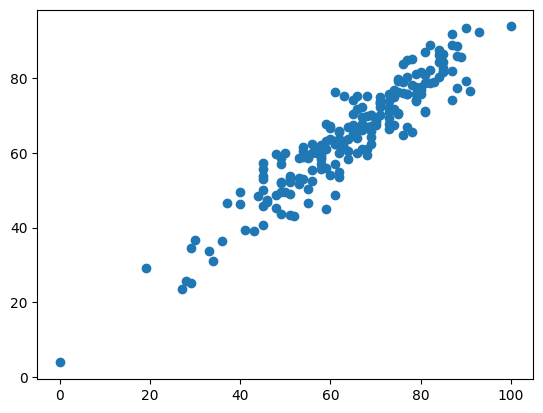

In [19]:
plt.scatter(y_test, y_pred)

<Axes: xlabel='math score'>

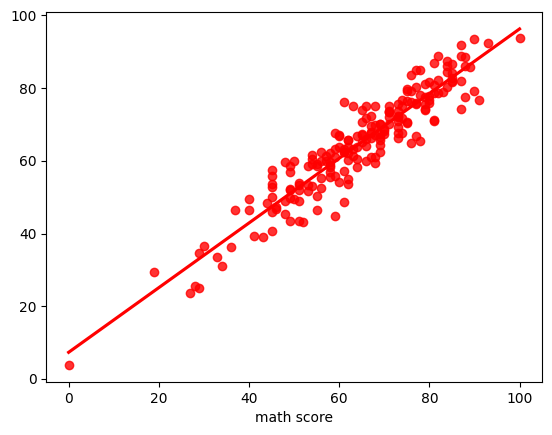

In [20]:
sns.regplot(x = y_test, y = y_pred, ci = None, color='red')

Difference between actual and predicted values

In [22]:
pred_df = pd.DataFrame({"Actual_values": y_test, 'Predicted_values': y_pred, 'Difference': y_pred-y_test})
pred_df

,Actual_values,Predicted_values,Difference
521,91,76.718750,-14.281250
737,53,58.593750,5.593750
740,80,76.843750,-3.156250
660,74,76.750000,2.750000
411,84,87.500000,3.500000
...,...,...,...
408,52,43.140625,-8.859375
332,62,62.125000,0.125000
208,74,67.578125,-6.421875
613,65,67.343750,2.343750
